In [33]:
# from neuralforecast.utils import AirPassengersDF
from statsforecast import StatsForecast
import pandas as pd
# from neuralforecast import NeuralForecast
# from neuralforecast.auto import AutoNHITS, AutoLSTM
# from neuralforecast.losses.pytorch import MQLoss
# import matplotlib.pyplot as plt
from utilsforecast.plotting import plot_series
import fn
from toolz.functoolz import pipe
from matplotlib import cm
import matplotlib
import plotly.graph_objects as go
# from ray import tune
import datetime
import plotly.express as px
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

from scipy.stats import poisson

In [34]:
# Y_df = AirPassengersDF # Defined in neuralforecast.utils
# Y_df.head()

Y_df = pipe(
  fn.loadDf("./data/Packets_30days_1minGran-2024-05-06_15_33_52.csv")
  #,fn.keep(["ds","NASDAQ_Canadian_Chix_A"])
  #,lambda df:df.rename(columns={"NASDAQ_Canadian_Chix_A":"y"})
  ,fn.dropNonMarketHours("13:28","20:00")
  #,fn.rescaleAllColumns
  ,fn.toLong
  #,fn.addExogenous("y")
  ,lambda df:df.fillna(0)
  #,fn.addUniqueId("1")
  # filter to weekdays, fitler to 13:30 to 20:00
)
Y_df.tail(400)

# https://nixtlaverse.nixtla.io/neuralforecast/examples/exogenous_variables.html#4-forecasting-with-exogenous-variables

loadDf: ./data/Packets_30days_1minGran-2024-05-06_15_33_52.csv


ds   unique_id         y
277010 2024-05-03 14:27:00  UTP_Feed_A  286274.4
277011 2024-05-03 14:28:00  UTP_Feed_A  311525.6
277012 2024-05-03 14:29:00  UTP_Feed_A  359808.8
277013 2024-05-03 14:30:00  UTP_Feed_A  404046.4
277014 2024-05-03 14:31:00  UTP_Feed_A  304527.2
...                    ...         ...       ...
277405 2024-05-06 14:29:00  UTP_Feed_A  184651.2
277406 2024-05-06 14:30:00  UTP_Feed_A  155747.2
277407 2024-05-06 14:31:00  UTP_Feed_A  198017.6
277408 2024-05-06 14:32:00  UTP_Feed_A  160464.0
277409 2024-05-06 14:33:00  UTP_Feed_A  131033.6

[400 rows x 3 columns]

In [35]:
freq = fn.inferFreq(Y_df)
print(freq)

None


In [36]:
StatsForecast.plot(Y_df, engine="plotly")   # , engine='matplotlib'


In [37]:

t_df = pipe(Y_df
  ,lambda df: df.set_index("ds")
  # ,lambda df: df.between_time("13:29","13:32")
  # ,lambda df: df.between_time("13:29","13:32")
  #,lambda df: df[df["unique_id"] == "UTP_Feed_A"]
)

px.histogram(t_df, x="y", title="Empirical distribution: ",nbins=25, range_x=[0, t_df['y'].max() + 1])    # plot-empdist


/tmp/ipykernel_224104/3489717354.py:10: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='y', ylabel='Density'>

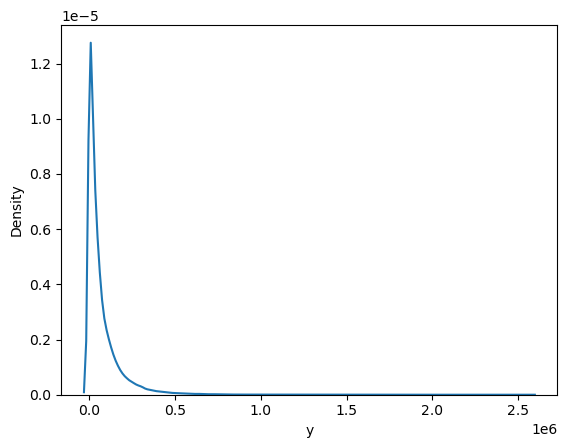

In [38]:
k=gaussian_kde(t_df["y"])
k([-1,0,1])
np.arange(0,1)

x = np.arange(0, 60000, 1)
 # poisson distribution data for y-axis
y = poisson.pmf(x, mu=10000)     # , loc=0   loc does shifting


sns.kdeplot(t_df["y"], bw=0.1)
# sns.lineplot(x=y,y=x)

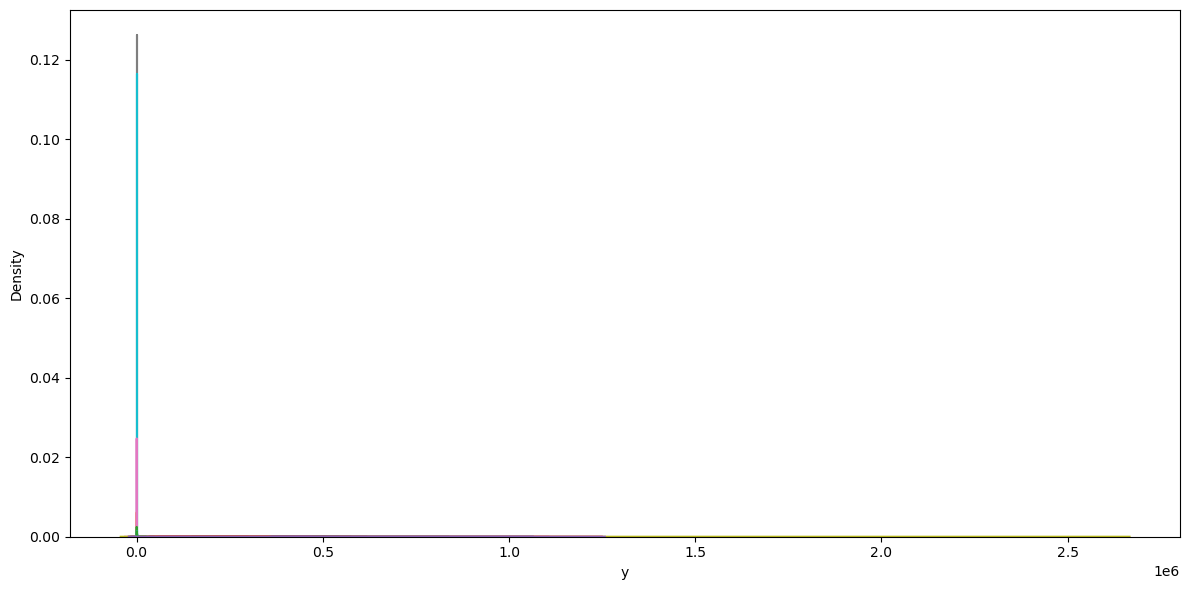

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

for c in t_df["unique_id"].unique():
  sns.kdeplot(data=t_df[t_df["unique_id"] == c]["y"], label=c, fill=False, ax=ax)  

#ax.legend()
plt.tight_layout()
plt.show()

In [40]:
[x,y]

[array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([0., 0., 0., ..., 0., 0., 0.])]